# United States Census
***

![title](th.jpg)

## Introduction

The data here is for the "Census Income" dataset, which contains data on adults from the 1994 census. This data is labeled with whether the person's yearly income is above or below $50K (and you are trying to model and predict this).

## Objectives

Objectives in this project:
- Perform data cleaning on the dataset
- Make a EDA report 
- Visualize the distributions of various features and correlations between them
- Feature engineering to extract the correct features for the model
- Build a classification model based on the features that you select  to predict if the income is above $50k or not


## Dataset

The dataset is in the form of a csv file and the link to download is given below:
Link: https://drive.google.com/file/d/1J9yQCKYAtzbO75_ApTNLGUceywQzfm_Y/view

## Dataset description

The dataset consist of 32562 rows and 14 features .The description of each feature is given below:

Listing of attributes:  >50K, <=50K. 
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 
  10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-  inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,       Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,   Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,    El-Salvador, Trinadad & Tobago, Peru, Hong, Holand-Netherlands.


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv('census - census.csv')

In [57]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [58]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [81]:
print((df['occupation']=="?").any())
print((df['workclass']=="?").any())


True
True


In [85]:
df['occupation'] = df['occupation'].str.replace('?','Prof-specialty')
df['workclass'] = df['workclass'].str.replace('?','Private')
print((df['occupation']=="?").any())
print((df['workclass']=="?").any())

False
False


In [86]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## EDA

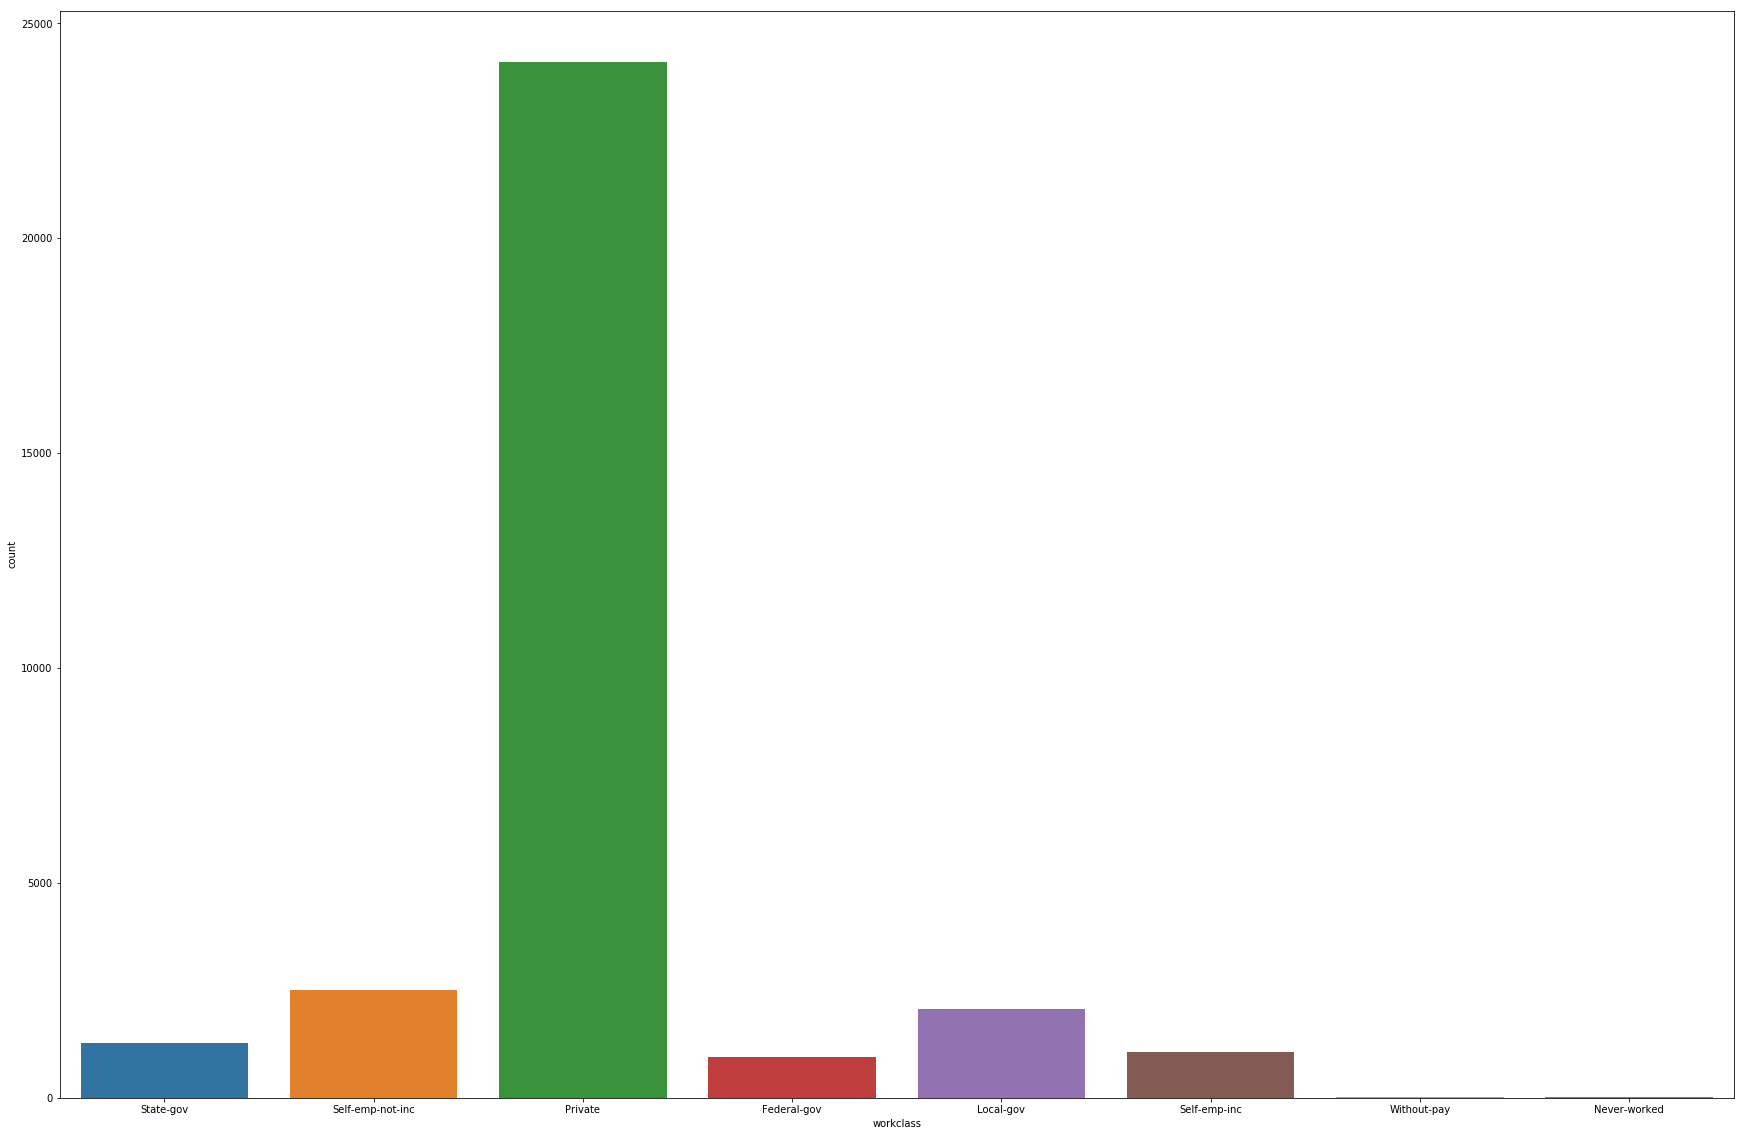

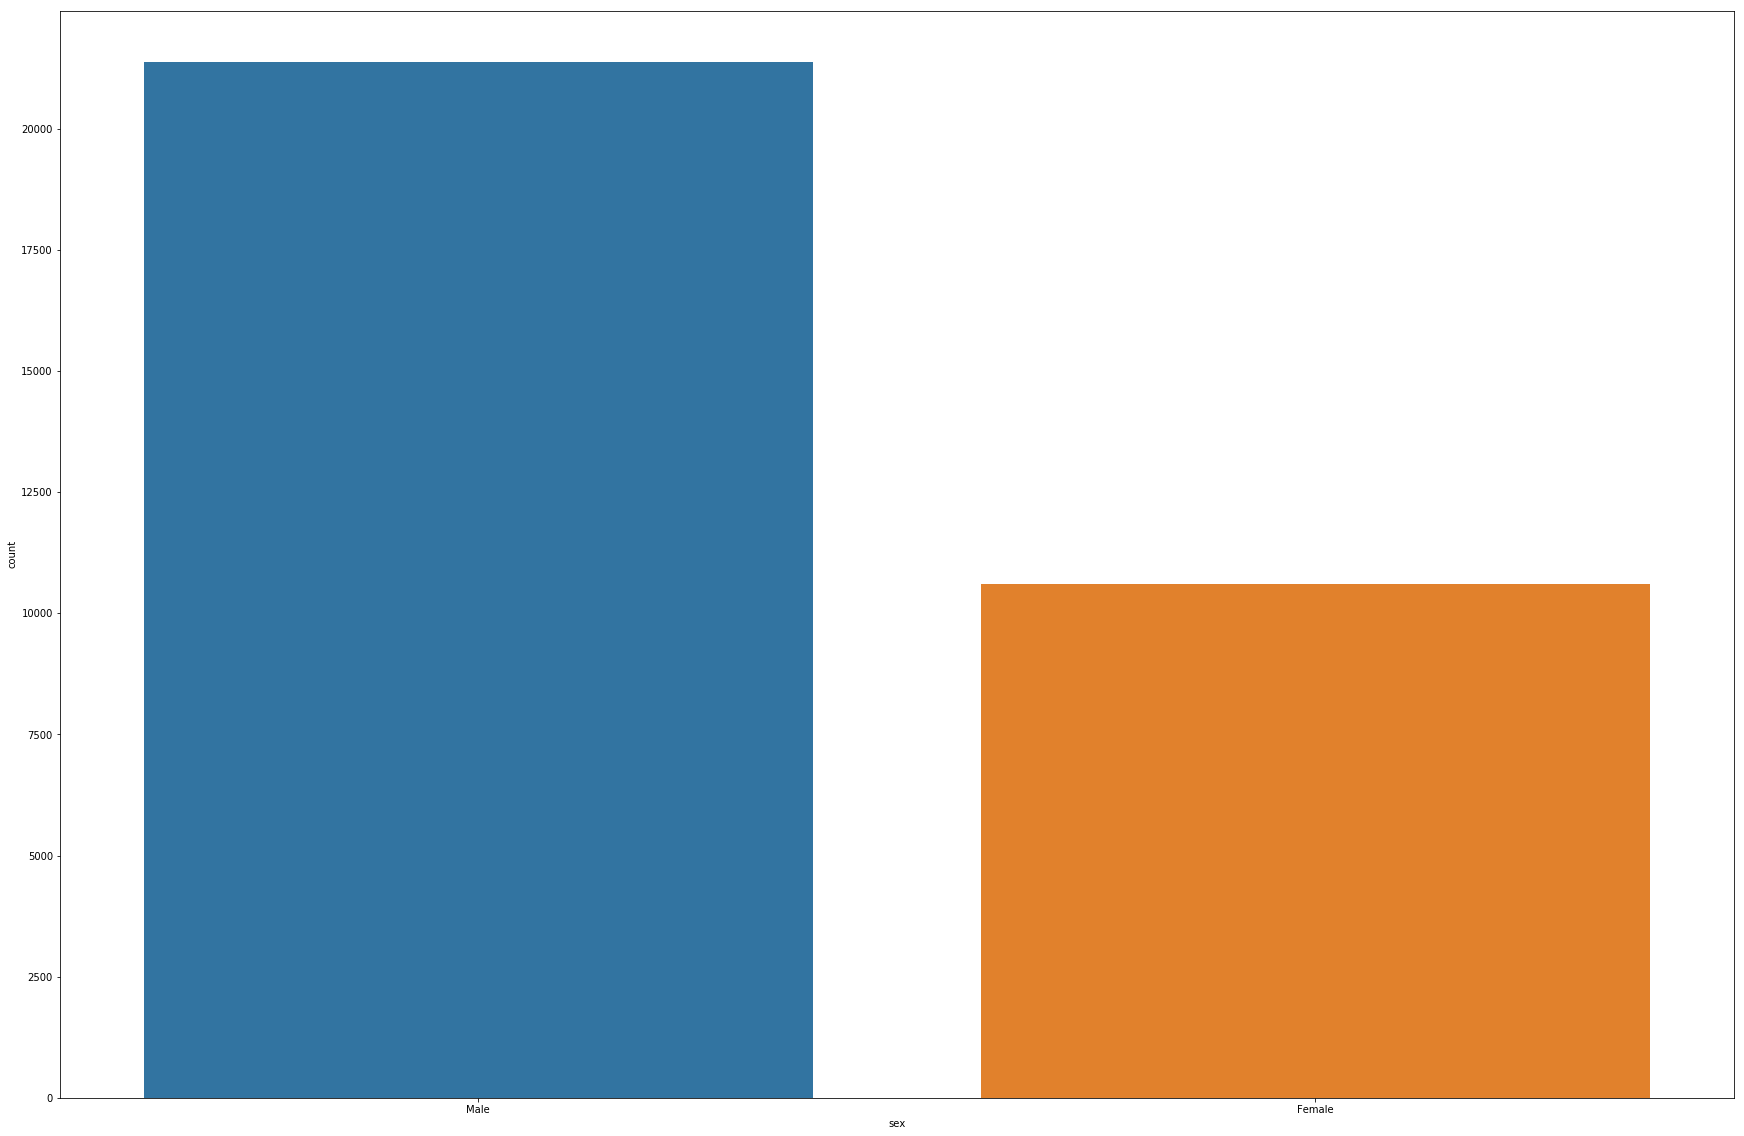

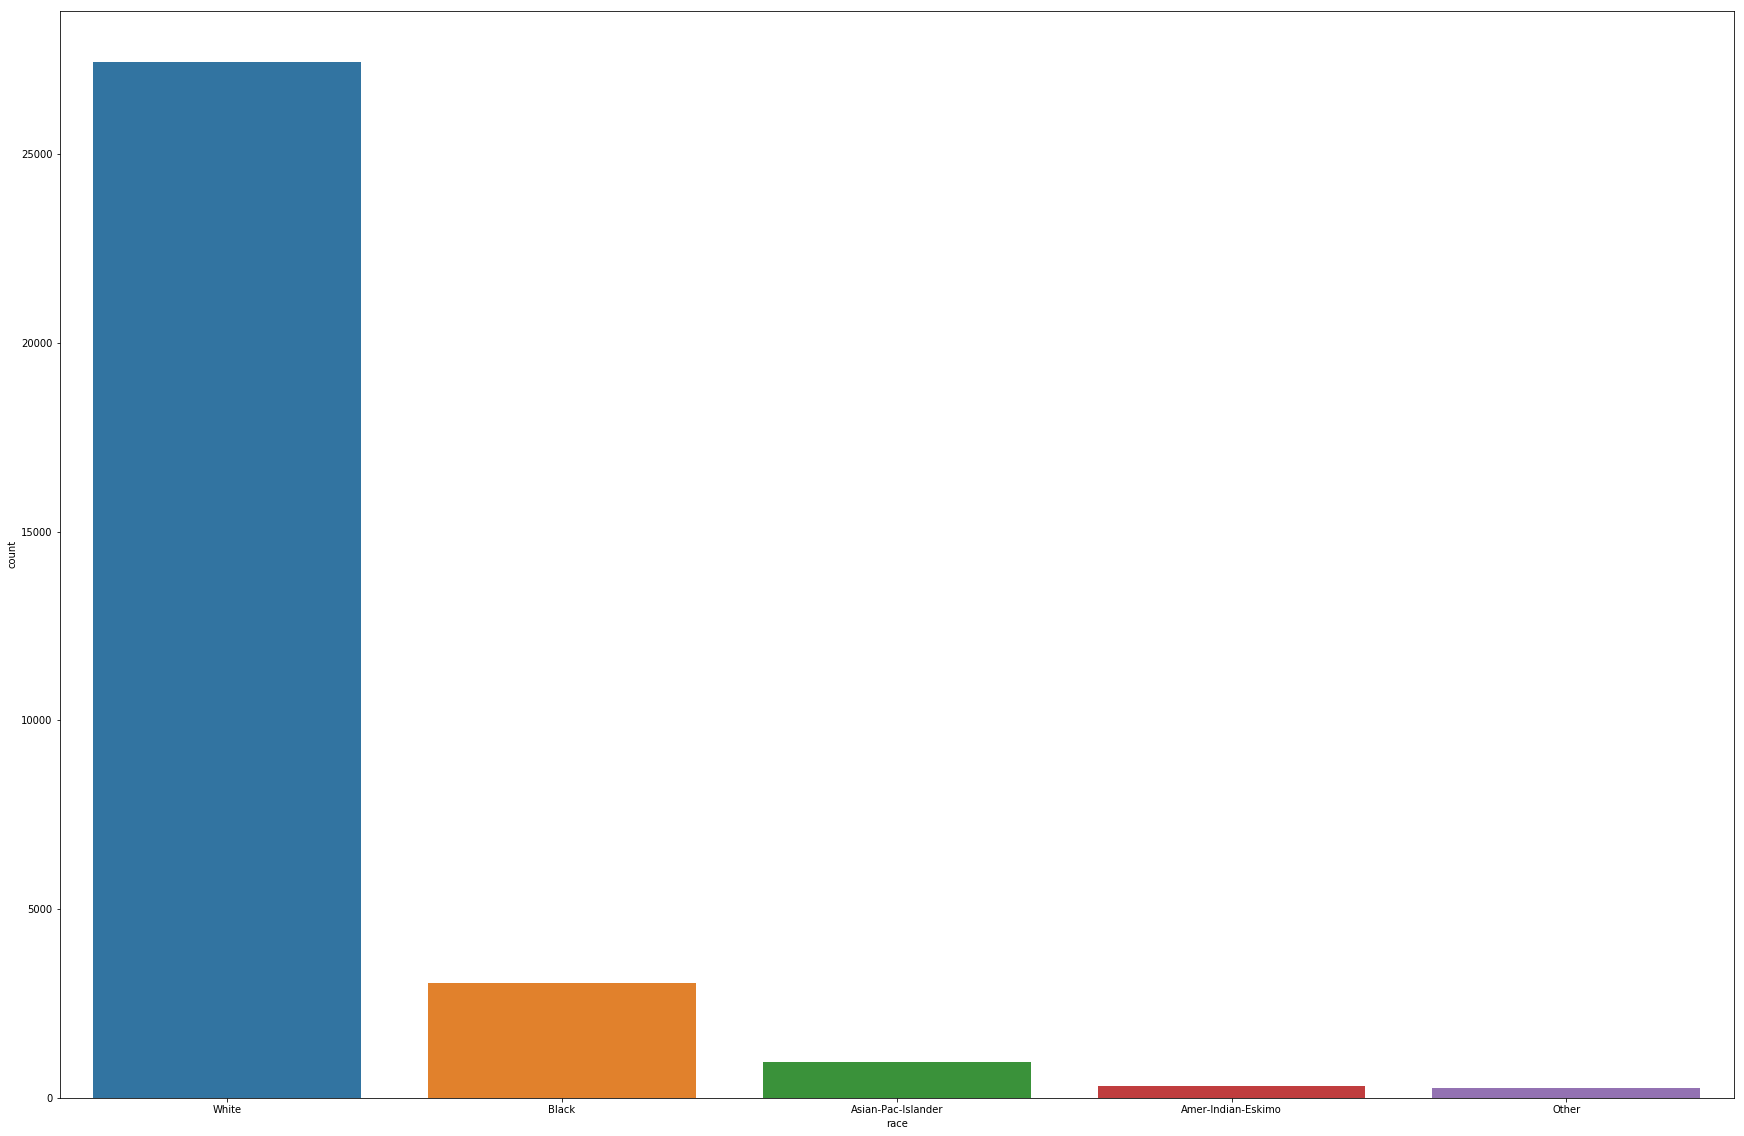

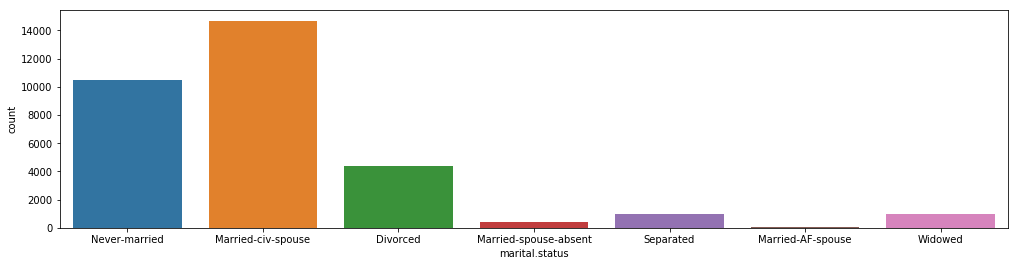

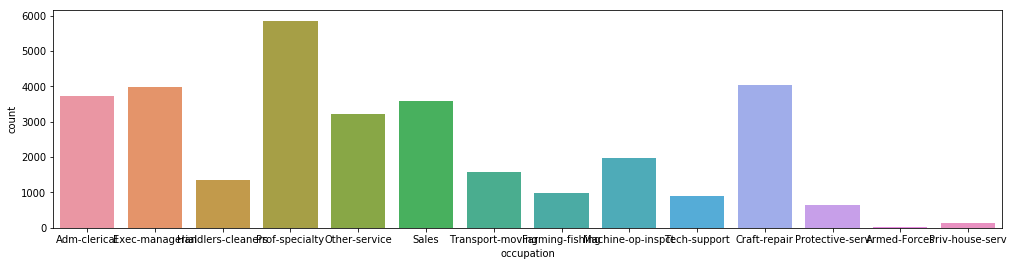

In [88]:
plt.rc("figure", figsize=(30,20 ))
plt.figure(0)
sns.countplot('workclass',data=df)
plt.figure(1)
sns.countplot('sex',data=df)
plt.figure(2)
sns.countplot('race',data=df)
plt.figure(3,figsize=(17,4))
sns.countplot('marital.status',data=df)
plt.figure(4,figsize=(17,4))
sns.countplot('occupation',data=df)


# Data Modelling

## Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [90]:
features = list(set(df.columns)-set(df['income']))
x = df[features]
y= df['income']
a = pd.get_dummies(x)


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,y,test_size=0.30,random_state=42)


In [70]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
y_pred=lr.predict(x_test)

## Actual and predicted values after prediction

In [73]:
pd.DataFrame({'Actual':list(y_test),'Predicted':list(y_pred)})

,Actual,Predicted
0,<=50K,<=50K
1,>50K,>50K
2,<=50K,<=50K
3,<=50K,<=50K
4,<=50K,<=50K
5,<=50K,<=50K
6,<=50K,<=50K
7,<=50K,<=50K
8,>50K,<=50K
9,<=50K,<=50K


## Model Evaluation

In [76]:
from sklearn.metrics import accuracy_score
s = accuracy_score(y_test,y_pred)
print("Accuracy Score:",s)

Accuracy Score: 0.795601417552637
